# 구독여부에 영향을 미치는 인자찾기

In [94]:
import pandas as pd
import numpy as np 
import warnings
import matplotlib
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# plt.rc('font',family = 'NanumGothic')
plt.rc('font',family = 'Malgun Gothic')
matplotlib.rc("axes",unicode_minus = False) # 음수표시 


#스케일
from sklearn.preprocessing import StandardScaler

#분류 SVM
from sklearn.svm import SVC

#로지스틱
from statsmodels.api import Logit

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score

In [95]:
df1 = pd.read_csv("회원전처리.csv")
df1

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,미기입,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,미기입,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
...,...,...,...,...,...,...,...,...,...
12531,1644772352,정상회원,여,50,국민카드,기혼,False,강원도,삼척시
12532,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구
12533,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시
12534,1670400000,탈퇴,남,28,연결앱결제,미기입,False,대구광역시,북구


In [96]:
# df1 = pd.read_csv("회원전처리.csv")
# df1
df2 = df1[df1["구독여부"].notnull()]
df2

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,미기입,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
5,19627200,정상회원,여,45,기업은행,미기입,False,전라북도,군산시
...,...,...,...,...,...,...,...,...,...
12530,1644735232,정상회원,여,22,농협중앙회,미혼,False,서울특별시,관악구
12531,1644772352,정상회원,여,50,국민카드,기혼,False,강원도,삼척시
12532,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구
12533,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시


# 정상회원인 회원만 남기기

In [97]:
df2 = df2[df2["회원상태"]=="정상회원"]

In [98]:
df2

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,미기입,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
5,19627200,정상회원,여,45,기업은행,미기입,False,전라북도,군산시
...,...,...,...,...,...,...,...,...,...
12529,1644705536,정상회원,여,66,국민은행,미혼,True,경기도,평택시
12530,1644735232,정상회원,여,22,농협중앙회,미혼,False,서울특별시,관악구
12531,1644772352,정상회원,여,50,국민카드,기혼,False,강원도,삼척시
12532,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구


In [99]:
df3 = pd.read_csv("실제구매(주문취소안한) 데이터.csv")
df3 = df3[df3["회원상태"]=="정상회원"]
df3

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,주문요일,주문요일을숫자로,주문월,주문일,출고기간,배송소요기간,주문시
0,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,0,PM 01:00,100022137V2_1606,Saturday,5,1,2,0 days,0 days,13
1,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,0,PM 01:00,100021452V2_1113,Saturday,5,1,2,0 days,1 days,13
2,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,0,PM 01:00,10002931V2_708,Saturday,5,1,2,0 days,1 days,13
3,369152832,정상회원,1.0,2489,2021-01-02,2021-01-02,2021-01-02,0,0,0,PM 01:00,100022160V2_1623,Saturday,5,1,2,0 days,0 days,13
4,441813376,정상회원,2.0,19144,2021-01-03,2021-01-05,2021-01-05,0,0,0,PM 01:00,100021509V2_1149,Sunday,6,1,3,2 days,0 days,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632393,1523874368,정상회원,1.0,166554,2021-10-19,2021-10-20,2021-10-20,0,0,0,AM 01:00,100022543V2_1912,Tuesday,1,10,19,1 days,0 days,1
632394,402835520,정상회원,1.0,12635,2021-10-23,2021-10-23,2021-10-24,0,0,0,AM 01:00,10002432V2_327,Saturday,5,10,23,0 days,1 days,1
632395,402835520,정상회원,1.0,7849,2021-10-23,2021-10-23,2021-10-23,0,0,0,AM 01:00,100022317V2_1725,Saturday,5,10,23,0 days,0 days,1
632396,1544381312,정상회원,1.0,7275,2021-10-27,2021-10-27,2021-10-28,6270,0,0,AM 01:00,10002723V2_563,Wednesday,2,10,27,0 days,1 days,1


## 구독 결측치를 날린 회원을 합침

In [100]:
df4 = pd.merge(df2,df3,on="회원번호")
df4.head()

,회원번호,회원상태_x,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,회원상태_y,...,주문취소여부,주문시간,제품번호,주문요일,주문요일을숫자로,주문월,주문일,출고기간,배송소요기간,주문시
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,정상회원,...,0,PM 11:25,10002574V2_441,Monday,0,8,23,0 days,1 days,23
1,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,정상회원,...,0,PM 11:25,100022290V2_1708,Monday,0,8,23,0 days,1 days,23
2,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,정상회원,...,0,PM 11:25,100022169V2_1631,Monday,0,8,23,0 days,0 days,23
3,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,정상회원,...,0,PM 11:25,100021606V2_1200,Monday,0,8,23,1 days,0 days,23
4,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,정상회원,...,0,PM 11:16,10002805V2_612,Thursday,3,8,5,0 days,2 days,23


In [101]:
df5 = df4.drop("회원상태_y",axis=1)

In [102]:
df6 = df5.rename({"회원상태_x":"회원상태"},axis=1)
df6

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,주문취소여부,주문시간,제품번호,주문요일,주문요일을숫자로,주문월,주문일,출고기간,배송소요기간,주문시
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,2.0,...,0,PM 11:25,10002574V2_441,Monday,0,8,23,0 days,1 days,23
1,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,2.0,...,0,PM 11:25,100022290V2_1708,Monday,0,8,23,0 days,1 days,23
2,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,1.0,...,0,PM 11:25,100022169V2_1631,Monday,0,8,23,0 days,0 days,23
3,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,1.0,...,0,PM 11:25,100021606V2_1200,Monday,0,8,23,1 days,0 days,23
4,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,2.0,...,0,PM 11:16,10002805V2_612,Thursday,3,8,5,0 days,2 days,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512248,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구,1.0,...,0,AM 08:12,10002808V2_614,Saturday,5,10,30,0 days,2 days,8
512249,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구,1.0,...,0,AM 08:12,10002580V2_446,Saturday,5,10,30,1 days,2 days,8
512250,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구,1.0,...,0,AM 08:12,100022094V2_1568,Saturday,5,10,30,1 days,1 days,8
512251,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구,1.0,...,0,AM 08:12,100022079V2_1554,Saturday,5,10,30,1 days,1 days,8


In [103]:
df7 = pd.read_csv("Clean_Product_Data.csv")
df8 = df7.drop("Unnamed: 0",axis=1)
df8

,제품번호,물품명,물품대분류,물품중분류,상품중량
0,100021V2_0,2단무늬컵,주방용품,자기,1p
1,100022V2_1,7곡딸기롤과자,간식/떡,스낵,100g/10개입
2,100023V2_2,7곡참식,냉장/냉동/간편식,선식/생식,700g
3,100024V2_3,가리비,수산/건어물,패류/갑각류,1.5kg
4,100025V2_3,가리비,수산/건어물,패류/갑각류,1kg
...,...,...,...,...,...
2544,100022545V2_1913,흑임자구름떡,간식/떡,즉석떡,180g
2545,100022546V2_1914,흑임자인절미,간식/떡,즉석떡,150g
2546,100022547V2_1915,흑토마토,과일,완숙토마토,1kg
2547,100022548V2_1915,흑토마토,과일,완숙토마토,1kg/소


## 물품명합치기

In [104]:
df9 = pd.merge(df6,df8,on="제품번호")
df9.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,주문요일을숫자로,주문월,주문일,출고기간,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,2.0,...,0,8,23,0 days,1 days,23,딸기꽁꽁,음료,빙과,120ml
1,27066048,정상회원,여,49,농협중앙회,기혼,False,경상북도,안동시,1.0,...,4,8,6,0 days,0 days,16,딸기꽁꽁,음료,빙과,120ml
2,39382464,정상회원,여,42,연결앱결제,기혼,False,부산광역시,부산진구,2.0,...,2,3,31,0 days,1 days,9,딸기꽁꽁,음료,빙과,120ml
3,42955264,정상회원,여,59,농협중앙회,기혼,False,제주특별자치도,서귀포시,1.0,...,2,8,25,0 days,1 days,14,딸기꽁꽁,음료,빙과,120ml
4,53384128,정상회원,남,42,롯데카드,기혼,False,경상북도,구미시,1.0,...,1,8,17,1 days,0 days,9,딸기꽁꽁,음료,빙과,120ml


# 첫구매제품 남기기

In [105]:
# 주문일시를 기준으로 올림차순하기
df10 = df9.sort_values(by='주문일시', ascending=True)

In [106]:
df10 = df10[df10["주소지"]!="미기입"]

## 1. 첫구매제품이므로 1월달에 산 제품들은 첫구매가 아닐 확률이 높기 때문에 2월달부터 제품만 남김 

In [107]:
df11 = df10[df10["주문월"] != 1]
df11

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,주문요일을숫자로,주문월,주문일,출고기간,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량
73057,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0,2,1,0 days,1 days,19,두부,냉장/냉동/간편식,두부,420g
107659,1241509952,정상회원,여,58,BC카드,기혼,False,광주광역시,서구,1.0,...,0,2,1,0 days,0 days,6,월동무,채소,월동무,0.9~1.2kg
65785,218382528,정상회원,여,38,신한카드,미기입,True,충청북도,증평군,1.0,...,0,2,1,0 days,1 days,12,두부,냉장/냉동/간편식,두부,420g
318564,827564416,정상회원,여,51,롯데카드,미기입,False,경기도,김포시,1.0,...,0,2,1,0 days,1 days,13,마요네즈,양념/장류/오일,기타양념,210g
61534,769091136,정상회원,여,48,우리은행,미혼,False,서울특별시,강남구,1.0,...,0,2,1,0 days,2 days,20,대파,채소,대파,300g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287974,472955200,정상회원,여,40,국민은행,미혼,False,충청북도,음성군,1.0,...,6,10,31,0 days,1 days,1,현미유,양념/장류/오일,기름,500ml
90202,836348864,정상회원,여,38,롯데카드,기혼,False,부산광역시,사하구,1.0,...,6,10,31,0 days,0 days,14,콩나물,채소,콩나물,300g
12953,266449216,정상회원,여,46,하나은행,기혼,False,경기도,성남시,1.0,...,6,10,31,0 days,0 days,23,유정란/친환경,정육/계란,논지엠오유정란,10알
352879,1051939968,정상회원,여,38,신한은행,미혼,False,서울특별시,마포구,1.0,...,6,10,31,0 days,0 days,10,잔멸치볶음,김치/반찬,볶음,150g


## 2. 
1) 각 회원당 첫주문일시를 구하기

In [108]:
df11.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,주문요일을숫자로,주문월,주문일,출고기간,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량
73057,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0,2,1,0 days,1 days,19,두부,냉장/냉동/간편식,두부,420g
107659,1241509952,정상회원,여,58,BC카드,기혼,False,광주광역시,서구,1.0,...,0,2,1,0 days,0 days,6,월동무,채소,월동무,0.9~1.2kg
65785,218382528,정상회원,여,38,신한카드,미기입,True,충청북도,증평군,1.0,...,0,2,1,0 days,1 days,12,두부,냉장/냉동/간편식,두부,420g
318564,827564416,정상회원,여,51,롯데카드,미기입,False,경기도,김포시,1.0,...,0,2,1,0 days,1 days,13,마요네즈,양념/장류/오일,기타양념,210g
61534,769091136,정상회원,여,48,우리은행,미혼,False,서울특별시,강남구,1.0,...,0,2,1,0 days,2 days,20,대파,채소,대파,300g


In [109]:
df11[df11['회원번호'] == 18764160]['주문일시'].iloc[0]

'2021-03-30'

In [110]:
df11[df11['회원번호'] == 435603200]

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,주문요일을숫자로,주문월,주문일,출고기간,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량
68994,435603200,정상회원,여,61,하나은행,기혼,True,경상북도,영주시,2.0,...,6,10,31,1 days,1 days,23,두부,냉장/냉동/간편식,두부,420g


In [59]:
first_order = df11.groupby('회원번호')['주문일시'].min()
a=pd.DataFrame(first_order)
a

,주문일시
회원번호,
18764160,2021-03-30
18792000,2021-04-05
18942336,2021-02-09
19391488,2021-05-19
19627200,2021-02-07
...,...
1644705536,2021-10-30
1644735232,2021-10-29
1644772352,2021-10-30


# 첫구매제품만 남음

In [60]:
# 같은 회원번호에서 가장 먼저 나오는 주문일시 구하기
first_order = df11.groupby('회원번호')['주문일시'].min()

# 같은 주문일시를 가지는 데이터만 남기기
df12 = pd.merge(df11,first_order,on=["회원번호","주문일시"])

# 결과 출력
df12

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,주문요일을숫자로,주문월,주문일,출고기간,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량
0,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0,2,1,0 days,1 days,19,두부,냉장/냉동/간편식,두부,420g
1,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0,2,1,0 days,0 days,19,우유식빵,빵,"식빵, 식사대용",180g
2,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0,2,1,0 days,2 days,19,시금치,채소,시금치,200g
3,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0,2,1,0 days,2 days,19,하늘땅감자,간식/떡,스낵,55g
4,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,2.0,...,0,2,1,0 days,0 days,19,우유,유제품,우유/산양유,200ml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30138,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,6,10,31,0 days,2 days,15,구운파래참김,수산/건어물,김,15장
30139,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,6,10,31,1 days,0 days,15,고추장멸치볶음,김치/반찬,볶음,150g
30140,1547170880,정상회원,남,33,롯데카드,미기입,False,서울특별시,강동구,1.0,...,6,10,31,0 days,1 days,1,분말청국장,양념/장류/오일,장류/기타,270g
30141,755067200,정상회원,여,25,BC카드,기혼,False,서울특별시,마포구,1.0,...,6,10,31,0 days,1 days,12,현미/유,쌀/잡곡/견과,멥쌀,2kg


In [61]:
df12.to_csv("첫구매제품만 전처리_혁준.csv",index=False)

In [62]:
df12.loc[df12["회원번호"]==435603200][["회원번호","주문일시","물품명"]]

,회원번호,주문일시,물품명
30142,435603200,2021-10-31,두부


## 첫구매제품만 남았고 총 구매금액으로 합치기

In [63]:
df20 = df12.copy()

In [64]:
df20['첫총구매금액'] = df12.groupby(['회원번호'])['구매금액'].transform('sum')
df20

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,주문월,주문일,출고기간,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량,첫총구매금액
0,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2,1,0 days,1 days,19,두부,냉장/냉동/간편식,두부,420g,66143
1,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2,1,0 days,0 days,19,우유식빵,빵,"식빵, 식사대용",180g,66143
2,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2,1,0 days,2 days,19,시금치,채소,시금치,200g,66143
3,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2,1,0 days,2 days,19,하늘땅감자,간식/떡,스낵,55g,66143
4,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,2.0,...,2,1,0 days,0 days,19,우유,유제품,우유/산양유,200ml,66143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30138,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,10,31,0 days,2 days,15,구운파래참김,수산/건어물,김,15장,49584
30139,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,10,31,1 days,0 days,15,고추장멸치볶음,김치/반찬,볶음,150g,49584
30140,1547170880,정상회원,남,33,롯데카드,미기입,False,서울특별시,강동구,1.0,...,10,31,0 days,1 days,1,분말청국장,양념/장류/오일,장류/기타,270g,15890
30141,755067200,정상회원,여,25,BC카드,기혼,False,서울특별시,마포구,1.0,...,10,31,0 days,1 days,12,현미/유,쌀/잡곡/견과,멥쌀,2kg,55901


### 첫 구매제품만 남겼음 -> 물품명대로 갯수세기

In [65]:
df12[["회원번호","주문일시","물품명"]]

,회원번호,주문일시,물품명
0,744508416,2021-02-01,두부
1,744508416,2021-02-01,우유식빵
2,744508416,2021-02-01,시금치
3,744508416,2021-02-01,하늘땅감자
4,744508416,2021-02-01,우유
...,...,...,...
30138,295486336,2021-10-31,구운파래참김
30139,295486336,2021-10-31,고추장멸치볶음
30140,1547170880,2021-10-31,분말청국장
30141,755067200,2021-10-31,현미/유


In [66]:
df12["물품명"].value_counts()

두부            1124
유정란/친환경        887
콩나물            652
동물복지유정란        583
찌개용두부          487
              ... 
매화마을 매실고         1
혼합표고선물모음3호       1
마늘/장아찌용          1
머위대              1
김장새우젓            1
Name: 물품명, Length: 1445, dtype: int64

# 첫구매제품 top20과 구독여부에 대한 독립성검정

### 첫구매한 구매 데이터만 남기기

In [67]:
df13 = df20.copy()

In [68]:
# 물품명 카운트해서 새로운 컬럼에 값 넣기
df13['첫구매개인별_종류수'] = df12.groupby(['회원번호'])['물품명'].transform('count')
df13['첫구매물품별_주문수'] = df12.groupby('물품명')['물품명'].transform('count')
df13

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,출고기간,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량,첫총구매금액,첫구매개인별_종류수,첫구매물품별_주문수
0,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,1 days,19,두부,냉장/냉동/간편식,두부,420g,66143,7,1124
1,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,0 days,19,우유식빵,빵,"식빵, 식사대용",180g,66143,7,39
2,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,2 days,19,시금치,채소,시금치,200g,66143,7,266
3,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,2 days,19,하늘땅감자,간식/떡,스낵,55g,66143,7,61
4,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,2.0,...,0 days,0 days,19,우유,유제품,우유/산양유,200ml,66143,7,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30138,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,0 days,2 days,15,구운파래참김,수산/건어물,김,15장,49584,4,29
30139,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,1 days,0 days,15,고추장멸치볶음,김치/반찬,볶음,150g,49584,4,11
30140,1547170880,정상회원,남,33,롯데카드,미기입,False,서울특별시,강동구,1.0,...,0 days,1 days,1,분말청국장,양념/장류/오일,장류/기타,270g,15890,1,10
30141,755067200,정상회원,여,25,BC카드,기혼,False,서울특별시,마포구,1.0,...,0 days,1 days,12,현미/유,쌀/잡곡/견과,멥쌀,2kg,55901,1,79


In [69]:
df13.isnull().sum()

회원번호            0
회원상태            0
성별              0
나이              0
등록카드            0
결혼              0
구독여부            0
주소지             0
세부주소지           0
구매수량            0
구매금액            0
주문일시            0
배송시작일           0
배송완료일           0
사용 적립금          0
사용 포인트 네이버      0
주문취소여부          0
주문시간            0
제품번호            0
주문요일            0
주문요일을숫자로        0
주문월             0
주문일             0
출고기간            0
배송소요기간          0
주문시             0
물품명             0
물품대분류           0
물품중분류           0
상품중량          682
첫총구매금액          0
첫구매개인별_종류수      0
첫구매물품별_주문수      0
dtype: int64

# 결측치있는행제거

In [70]:
df14 = df13.dropna()
df14

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,출고기간,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량,첫총구매금액,첫구매개인별_종류수,첫구매물품별_주문수
0,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,1 days,19,두부,냉장/냉동/간편식,두부,420g,66143,7,1124
1,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,0 days,19,우유식빵,빵,"식빵, 식사대용",180g,66143,7,39
2,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,2 days,19,시금치,채소,시금치,200g,66143,7,266
3,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,2 days,19,하늘땅감자,간식/떡,스낵,55g,66143,7,61
4,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,2.0,...,0 days,0 days,19,우유,유제품,우유/산양유,200ml,66143,7,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30138,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,0 days,2 days,15,구운파래참김,수산/건어물,김,15장,49584,4,29
30139,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,1 days,0 days,15,고추장멸치볶음,김치/반찬,볶음,150g,49584,4,11
30140,1547170880,정상회원,남,33,롯데카드,미기입,False,서울특별시,강동구,1.0,...,0 days,1 days,1,분말청국장,양념/장류/오일,장류/기타,270g,15890,1,10
30141,755067200,정상회원,여,25,BC카드,기혼,False,서울특별시,마포구,1.0,...,0 days,1 days,12,현미/유,쌀/잡곡/견과,멥쌀,2kg,55901,1,79


In [71]:
#df14[df14["첫구매물품별_주문수"]>20].count()

In [72]:
df14.columns

Index(['회원번호', '회원상태', '성별', '나이', '등록카드', '결혼', '구독여부', '주소지', '세부주소지',
       '구매수량', '구매금액', '주문일시', '배송시작일', '배송완료일', '사용 적립금', '사용 포인트 네이버',
       '주문취소여부', '주문시간', '제품번호', '주문요일', '주문요일을숫자로', '주문월', '주문일', '출고기간',
       '배송소요기간', '주문시', '물품명', '물품대분류', '물품중분류', '상품중량', '첫총구매금액',
       '첫구매개인별_종류수', '첫구매물품별_주문수'],
      dtype='object')

# 연령대별로 범주화 하기

In [73]:
df14["연령대"] = df14["나이"]
df14.head(2)

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량,첫총구매금액,첫구매개인별_종류수,첫구매물품별_주문수,연령대
0,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,1 days,19,두부,냉장/냉동/간편식,두부,420g,66143,7,1124,55
1,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,19,우유식빵,빵,"식빵, 식사대용",180g,66143,7,39,55


In [74]:
df101 = df14.copy()
df101.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량,첫총구매금액,첫구매개인별_종류수,첫구매물품별_주문수,연령대
0,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,1 days,19,두부,냉장/냉동/간편식,두부,420g,66143,7,1124,55
1,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,19,우유식빵,빵,"식빵, 식사대용",180g,66143,7,39,55
2,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2 days,19,시금치,채소,시금치,200g,66143,7,266,55
3,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2 days,19,하늘땅감자,간식/떡,스낵,55g,66143,7,61,55
4,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,2.0,...,0 days,19,우유,유제품,우유/산양유,200ml,66143,7,86,55


In [75]:
df101["나이"] = df101["나이"].astype("int")

In [76]:
df101.loc[(df101['나이']>= 20) & (df101['나이']< 30)]

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량,첫총구매금액,첫구매개인별_종류수,첫구매물품별_주문수,연령대
57,794755904,정상회원,여,28,롯데카드,기혼,False,충청북도,진천군,1.0,...,2 days,14,자장가루,양념/장류/오일,양념가루,100g,74088,7,36,28
58,794755904,정상회원,여,28,롯데카드,기혼,False,충청북도,진천군,1.0,...,1 days,14,쫄면,냉장/냉동/간편식,간편조리면,490g/2인분,74088,7,14,28
59,794755904,정상회원,여,28,롯데카드,기혼,False,충청북도,진천군,1.0,...,0 days,14,대파,채소,대파,300g,74088,7,428,28
60,794755904,정상회원,여,28,롯데카드,기혼,False,충청북도,진천군,1.0,...,0 days,14,꼬마소시지,정육/계란,햄/소시지/훈제,300g-,74088,7,41,28
61,794755904,정상회원,여,28,롯데카드,기혼,False,충청북도,진천군,1.0,...,0 days,14,말랑말랑백미가래떡,간식/떡,즉석떡,400g,74088,7,57,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30127,1549524288,정상회원,여,29,삼성카드,기혼,True,경상북도,구미시,1.0,...,0 days,20,쑥찐빵,빵,"찐빵,호떡,전통",400g/5개/,32640,6,15,29
30128,1549524288,정상회원,여,29,삼성카드,기혼,True,경상북도,구미시,1.0,...,1 days,20,황토숙주나물,채소,숙주나물,300g,32640,6,85,29
30129,1326280896,정상회원,여,20,새마을금고,기혼,False,서울특별시,강남구,2.0,...,1 days,12,두부,냉장/냉동/간편식,두부,420g,7466,1,1124,20
30135,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시,1.0,...,1 days,2,쌍화차,건강식품,추출/농축액,70ml,49775,1,41,24


In [77]:
df101

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량,첫총구매금액,첫구매개인별_종류수,첫구매물품별_주문수,연령대
0,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,1 days,19,두부,냉장/냉동/간편식,두부,420g,66143,7,1124,55
1,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,19,우유식빵,빵,"식빵, 식사대용",180g,66143,7,39,55
2,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2 days,19,시금치,채소,시금치,200g,66143,7,266,55
3,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2 days,19,하늘땅감자,간식/떡,스낵,55g,66143,7,61,55
4,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,2.0,...,0 days,19,우유,유제품,우유/산양유,200ml,66143,7,86,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30138,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,2 days,15,구운파래참김,수산/건어물,김,15장,49584,4,29,58
30139,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,0 days,15,고추장멸치볶음,김치/반찬,볶음,150g,49584,4,11,58
30140,1547170880,정상회원,남,33,롯데카드,미기입,False,서울특별시,강동구,1.0,...,1 days,1,분말청국장,양념/장류/오일,장류/기타,270g,15890,1,10,33
30141,755067200,정상회원,여,25,BC카드,기혼,False,서울특별시,마포구,1.0,...,1 days,12,현미/유,쌀/잡곡/견과,멥쌀,2kg,55901,1,79,25


In [78]:
df101.loc[(df101['나이']< 30),"연령대"] = "20대"
df101.loc[(df101['나이']>= 30) & (df101['나이']< 40),"연령대"] = "30대"
df101.loc[(df101['나이']>= 40) & (df101['나이']< 50),"연령대"] = "40대"
df101.loc[(df101['나이']>= 50) & (df101['나이']< 60),"연령대"] = "50대"
df101.loc[(df101['나이']>= 60),"연령대"] = "60대이상"
df101

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,구매수량,...,배송소요기간,주문시,물품명,물품대분류,물품중분류,상품중량,첫총구매금액,첫구매개인별_종류수,첫구매물품별_주문수,연령대
0,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,1 days,19,두부,냉장/냉동/간편식,두부,420g,66143,7,1124,50대
1,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,0 days,19,우유식빵,빵,"식빵, 식사대용",180g,66143,7,39,50대
2,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2 days,19,시금치,채소,시금치,200g,66143,7,266,50대
3,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,1.0,...,2 days,19,하늘땅감자,간식/떡,스낵,55g,66143,7,61,50대
4,744508416,정상회원,여,55,롯데카드,기혼,False,광주광역시,서구,2.0,...,0 days,19,우유,유제품,우유/산양유,200ml,66143,7,86,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30138,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,2 days,15,구운파래참김,수산/건어물,김,15장,49584,4,29,50대
30139,295486336,정상회원,여,58,신한은행,미혼,True,충청남도,부여군,1.0,...,0 days,15,고추장멸치볶음,김치/반찬,볶음,150g,49584,4,11,50대
30140,1547170880,정상회원,남,33,롯데카드,미기입,False,서울특별시,강동구,1.0,...,1 days,1,분말청국장,양념/장류/오일,장류/기타,270g,15890,1,10,30대
30141,755067200,정상회원,여,25,BC카드,기혼,False,서울특별시,마포구,1.0,...,1 days,12,현미/유,쌀/잡곡/견과,멥쌀,2kg,55901,1,79,20대


In [79]:
df101.columns

Index(['회원번호', '회원상태', '성별', '나이', '등록카드', '결혼', '구독여부', '주소지', '세부주소지',
       '구매수량', '구매금액', '주문일시', '배송시작일', '배송완료일', '사용 적립금', '사용 포인트 네이버',
       '주문취소여부', '주문시간', '제품번호', '주문요일', '주문요일을숫자로', '주문월', '주문일', '출고기간',
       '배송소요기간', '주문시', '물품명', '물품대분류', '물품중분류', '상품중량', '첫총구매금액',
       '첫구매개인별_종류수', '첫구매물품별_주문수', '연령대'],
      dtype='object')

In [80]:
df15 = df101.copy()

In [82]:
df16 = df15[['구독여부','회원번호', '성별', '연령대', '주소지', '첫구매개인별_종류수',"첫총구매금액"]]
df16.head()

,구독여부,회원번호,성별,연령대,주소지,첫구매개인별_종류수,첫총구매금액
0,False,744508416,여,50대,광주광역시,7,66143
1,False,744508416,여,50대,광주광역시,7,66143
2,False,744508416,여,50대,광주광역시,7,66143
3,False,744508416,여,50대,광주광역시,7,66143
4,False,744508416,여,50대,광주광역시,7,66143


In [85]:
# df15 = df14[['회원번호', '성별', '나이', '구독여부', '주소지','물품명', '물품대분류', '물품중분류', '첫구매개인별_종류수','첫구매물품별_주문수',"첫총구매금액"]]
# df15.head()

1. 성별 0,1
2. 나이 연령대로 나누기
3. 구독여부 true:1, false:0

# 같은 회원id는 1개만 남기기

In [86]:
df1030 = df16.copy()

In [91]:
df1030 = df1030.drop_duplicates("회원번호")
df1030

,구독여부,회원번호,성별,연령대,주소지,첫구매개인별_종류수,첫총구매금액
0,False,744508416,여,50대,광주광역시,7,66143
7,False,1241509952,여,50대,광주광역시,3,22686
10,True,218382528,여,30대,충청북도,3,27568
13,False,827564416,여,50대,경기도,3,23164
16,False,769091136,여,40대,서울특별시,8,61453
...,...,...,...,...,...,...,...
30135,False,1645334720,남,20대,전라남도,1,49775
30136,True,295486336,여,50대,충청남도,4,49584
30140,False,1547170880,남,30대,서울특별시,1,15890
30141,False,755067200,여,20대,서울특별시,1,55901


In [93]:
df1030

,구독여부,회원번호,성별,연령대,주소지,첫구매개인별_종류수,첫총구매금액
0,False,744508416,여,50대,광주광역시,7,66143
7,False,1241509952,여,50대,광주광역시,3,22686
10,True,218382528,여,30대,충청북도,3,27568
13,False,827564416,여,50대,경기도,3,23164
16,False,769091136,여,40대,서울특별시,8,61453
...,...,...,...,...,...,...,...
30135,False,1645334720,남,20대,전라남도,1,49775
30136,True,295486336,여,50대,충청남도,4,49584
30140,False,1547170880,남,30대,서울특별시,1,15890
30141,False,755067200,여,20대,서울특별시,1,55901


In [92]:
df1030["연령대"].value_counts()

30대      3619
40대      2562
50대      1396
20대      1142
60대이상     893
Name: 연령대, dtype: int64

## 구독여부,성별 변환

In [185]:
df16 = df1030.copy()

In [186]:
df17 = df16.replace({'구독여부': {False:0,True:1},
                    '성별':{"여":0,"남":1}})
df17

,구독여부,회원번호,성별,연령대,주소지,첫구매개인별_종류수,첫총구매금액
0,0,744508416,0,50대,광주광역시,7,66143
7,0,1241509952,0,50대,광주광역시,3,22686
10,1,218382528,0,30대,충청북도,3,27568
13,0,827564416,0,50대,경기도,3,23164
16,0,769091136,0,40대,서울특별시,8,61453
...,...,...,...,...,...,...,...
30135,0,1645334720,1,20대,전라남도,1,49775
30136,1,295486336,0,50대,충청남도,4,49584
30140,0,1547170880,1,30대,서울특별시,1,15890
30141,0,755067200,0,20대,서울특별시,1,55901


# 더미화

In [187]:
df18 = pd.get_dummies(df17)
df18

,구독여부,회원번호,성별,첫구매개인별_종류수,첫총구매금액,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,...,주소지_부산광역시,주소지_서울특별시,주소지_세종특별자치시,주소지_울산광역시,주소지_인천광역시,주소지_전라남도,주소지_전라북도,주소지_제주특별자치도,주소지_충청남도,주소지_충청북도
0,0,744508416,0,7,66143,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1241509952,0,3,22686,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,1,218382528,0,3,27568,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,0,827564416,0,3,23164,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16,0,769091136,0,8,61453,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30135,0,1645334720,1,1,49775,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30136,1,295486336,0,4,49584,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
30140,0,1547170880,1,1,15890,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30141,0,755067200,0,1,55901,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [188]:
#회원번호드랍
df19 = df18.drop("회원번호",axis=1)
df19

,구독여부,성별,첫구매개인별_종류수,첫총구매금액,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,주소지_강원도,...,주소지_부산광역시,주소지_서울특별시,주소지_세종특별자치시,주소지_울산광역시,주소지_인천광역시,주소지_전라남도,주소지_전라북도,주소지_제주특별자치도,주소지_충청남도,주소지_충청북도
0,0,0,7,66143,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,3,22686,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,3,27568,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,0,0,3,23164,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,8,61453,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30135,0,1,1,49775,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30136,1,0,4,49584,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
30140,0,1,1,15890,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30141,0,0,1,55901,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# 분류모델을 돌리기 위해 컬럼 뽑아내기

- 목표변수 y: 구독여부 (구독o:1, 구독x: 0)
- 설명변수 x:
1. 성별	
2. 연령대
3. 구독여부
4. 주소지
5. 첫구매개인별_종류수	
6. 첫총구매금액

In [41]:
df19

NameError: name 'df19' is not defined

# 모델링

## 1. 로지스틱 회귀분석

In [285]:
df19.corr()

,구독여부,성별,첫구매개인별_종류수,첫총구매금액,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,주소지_강원도,...,주소지_부산광역시,주소지_서울특별시,주소지_세종특별자치시,주소지_울산광역시,주소지_인천광역시,주소지_전라남도,주소지_전라북도,주소지_제주특별자치도,주소지_충청남도,주소지_충청북도
구독여부,1.000000,0.023723,0.004749,-0.011424,0.004607,-0.018809,-0.000783,0.012860,0.011843,0.003939,...,-0.014100,-0.002020,0.011465,-0.002649,-0.011972,-0.009511,-0.011655,-0.015934,0.011082,-0.008737
성별,0.023723,1.000000,0.032665,0.027507,0.024626,-0.034886,-0.003378,-0.007296,0.044778,-0.007290,...,0.006964,-0.005316,0.004880,0.008065,-0.000040,0.015136,-0.008159,-0.008407,0.012999,-0.009321
첫구매개인별_종류수,0.004749,0.032665,1.000000,0.581691,-0.006019,0.013997,-0.004730,0.020443,-0.034261,-0.009335,...,0.004901,0.020238,-0.008493,-0.014707,0.007675,0.005265,0.014246,-0.001934,-0.002208,0.001217
첫총구매금액,-0.011424,0.027507,0.581691,1.000000,-0.043378,-0.026269,0.031090,0.030234,0.008142,0.010109,...,0.002342,0.002668,-0.015720,0.002122,0.008877,-0.002798,0.006179,0.002943,0.005589,0.017928
연령대_20대,0.004607,0.024626,-0.006019,-0.043378,1.000000,-0.285341,-0.221353,-0.151357,-0.117512,0.003259,...,-0.012397,0.016092,0.009043,-0.001717,-0.001412,0.001793,-0.014561,0.011325,-0.006050,-0.003901
연령대_30대,-0.018809,-0.034886,0.013997,-0.026269,-0.285341,1.000000,-0.468454,-0.320320,-0.248694,0.002507,...,-0.001273,0.002437,-0.010784,0.026618,0.000286,-0.019048,0.005593,-0.010703,-0.005704,0.010428
연령대_40대,-0.000783,-0.003378,-0.004730,0.031090,-0.221353,-0.468454,1.000000,-0.248489,-0.192925,-0.009643,...,0.010324,0.014929,0.004499,-0.018697,0.004207,0.008592,0.000623,0.005185,-0.008447,0.005402
연령대_50대,0.012860,-0.007296,0.020443,0.030234,-0.151357,-0.320320,-0.248489,1.000000,-0.131918,0.001926,...,-0.008826,-0.026390,0.004254,-0.010795,0.000693,-0.002169,0.014064,-0.006006,0.022016,-0.006787
연령대_60대이상,0.011843,0.044778,-0.034261,0.008142,-0.117512,-0.248694,-0.192925,-0.131918,1.000000,0.004532,...,0.010929,-0.012712,-0.004097,-0.000933,-0.006152,0.019338,-0.011123,0.004635,0.002410,-0.013048
주소지_강원도,0.003939,-0.007290,-0.009335,0.010109,0.003259,0.002507,-0.009643,0.001926,0.004532,1.000000,...,-0.077979,-0.080620,-0.021057,-0.041413,-0.046091,-0.037457,-0.044516,-0.023043,-0.048084,-0.047389


In [286]:
df17

,구독여부,회원번호,성별,연령대,주소지,첫구매개인별_종류수,첫총구매금액
0,0,744508416,0,50대,광주광역시,7,66143
7,0,1241509952,0,50대,광주광역시,3,22686
10,1,218382528,0,30대,충청북도,3,27568
13,0,827564416,0,50대,경기도,3,23164
16,0,769091136,0,40대,서울특별시,8,61453
...,...,...,...,...,...,...,...
30135,0,1645334720,1,20대,전라남도,1,49775
30136,1,295486336,0,50대,충청남도,4,49584
30140,0,1547170880,1,30대,서울특별시,1,15890
30141,0,755067200,0,20대,서울특별시,1,55901


In [287]:
df17["주소지"].unique()

array(['광주광역시', '충청북도', '경기도', '서울특별시', '충청남도', '강원도', '전라북도', '부산광역시',
       '대전광역시', '경상남도', '세종특별자치시', '전라남도', '울산광역시', '경상북도', '인천광역시',
       '대구광역시', '제주특별자치도'], dtype=object)

In [288]:
df = df17.copy()

In [289]:
df_train_x_over,df_test_x_over,df_train_y_over,df_test_y_over = train_test_split(x_resampled,y_resampled,test_size=0.3,
                                                                                stratify=y_resampled,random_state=1)
print('분할 전:',x_resampled.shape,"목표: ",y_resampled.shape)
print('분할 후 설명변수 현황 train:',df_train_x_over.shape,"test: ",df_test_x_over.shape)
print('분할 후 목표변수 현황 train:',df_train_y_over.value_counts(),"test: ",df_test_y_over.value_counts())

분할 전: (9578, 25) 목표:  (9578,)
분할 후 설명변수 현황 train: (6704, 25) test:  (2874, 25)
분할 후 목표변수 현황 train: 1    3352
0    3352
Name: 구독여부, dtype: int64 test:  1    1437
0    1437
Name: 구독여부, dtype: int64


In [290]:
df_train, df_test = train_test_split(df,
                                     test_size =0.4, random_state=1234)

print("train data size: {}".format(df_train.shape))
print("Test data size: {}".format(df_test.shape))

train data size: (5767, 7)
Test data size: (3845, 7)


In [291]:
df.columns

Index(['구독여부', '회원번호', '성별', '연령대', '주소지', '첫구매개인별_종류수', '첫총구매금액'], dtype='object')

In [292]:
log_model = Logit.from_formula("""구독여부 ~ 성별+C(연령대)+C(주소지) + 첫구매개인별_종류수+첫총구매금액""", df_train)
log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.452508
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   구독여부   No. Observations:                 5767
Model:                          Logit   Df Residuals:                     5743
Method:                           MLE   Df Model:                           23
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                0.005975
Time:                        01:49:42   Log-Likelihood:                -2609.6
converged:                       True   LL-Null:                       -2625.3
Covariance Type:            nonrobust   LLR p-value:                    0.1139
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5191      0.193     -7.879      0.000      -1.897      -1.141
C(연령대)[T

In [293]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print('Train 예측 결과 \n', y_pred_train_class.head(),'\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['구독여부'],y_pred_train_class)),'\n')
# test 데이터 예측
y_pred_test = log_result.predict(df_test)
y_pred_test_class = (y_pred_test > 0.5). astype(int)
print('Test 예측 결과 \n', y_pred_train_class.head(),'\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['구독여부'],y_pred_train_class)),'\n')

Train 예측 결과 
 17177    0
2258     0
21632    0
6505     0
19273    0
dtype: int32 

Confusion Matrix:
[[4789    0]
 [ 978    0]] 

Test 예측 결과 
 17177    0
2258     0
21632    0
6505     0
19273    0
dtype: int32 

Confusion Matrix:
[[4789    0]
 [ 978    0]] 



In [294]:
# 실제 train 데이터와 예측 결과 비교
print('Train 예측/분류 결과')
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_train['구독여부'], y_pred_train_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['구독여부'],y_pred_train_class)),'\n')
print(classification_report(df_train['구독여부'], y_pred_train_class, digits=3))

# 실제 test 데이터와 예측 결과 비교
print('Test 예측/분류 결과')
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_test['구독여부'], y_pred_test_class)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test['구독여부'],y_pred_test_class)),'\n')
print(classification_report(df_test['구독여부'], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.830

Confusion Matrix:
[[4789    0]
 [ 978    0]] 

              precision    recall  f1-score   support

           0      0.830     1.000     0.907      4789
           1      0.000     0.000     0.000       978

    accuracy                          0.830      5767
   macro avg      0.415     0.500     0.454      5767
weighted avg      0.690     0.830     0.753      5767

Test 예측/분류 결과
Accuracy: 0.822

Confusion Matrix: 
[[3160    0]
 [ 685    0]] 

              precision    recall  f1-score   support

           0      0.822     1.000     0.902      3160
           1      0.000     0.000     0.000       685

    accuracy                          0.822      3845
   macro avg      0.411     0.500     0.451      3845
weighted avg      0.675     0.822     0.741      3845



## 지금은 스케일링을 하지 않았기 때문에 표준화하여 coef 확인

In [295]:
#30
df_char =df.select_dtypes(include = 'object')
df_numeric =df.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled=pd.DataFrame(np_numeric_scaled, columns =df_numeric.columns)

df_scaled= pd.concat([df_numeric_scaled, df_char], axis =1)
df_scaled.head()

,구독여부,회원번호,성별,첫구매개인별_종류수,첫총구매금액,연령대,주소지
0,-0.457393,-0.158845,-0.246122,1.512170,0.524659,50대,광주광역시
1,-0.457393,0.973175,-0.246122,-0.048507,-0.364349,NaN,NaN
2,2.186302,-1.357202,-0.246122,-0.048507,-0.264477,NaN,NaN
3,-0.457393,0.030331,-0.246122,-0.048507,-0.354571,NaN,NaN
4,-0.457393,-0.102853,-0.246122,1.902339,0.428715,NaN,NaN


In [296]:
# 31 
df_scaled['구독여부'] = np.where(df_scaled['구독여부'] >0,1,0)
df_scaled.head()

df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size =0.3, random_state = 1234)

In [297]:
# 32
scaled_log_model = Logit.from_formula("""구독여부 ~ 성별+C(연령대)+C(주소지) + 첫구매개인별_종류수+첫총구매금액""", df_scaled_train)

scaled_log_result = scaled_log_model.fit()

print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.447871
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   구독여부   No. Observations:                 1939
Model:                          Logit   Df Residuals:                     1915
Method:                           MLE   Df Model:                           23
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                 0.01470
Time:                        01:49:45   Log-Likelihood:                -868.42
converged:                       True   LL-Null:                       -881.37
Covariance Type:            nonrobust   LLR p-value:                    0.3054
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.0165      0.370     -5.449      0.000      -2.742      -1.291
C(연령대)[T

<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

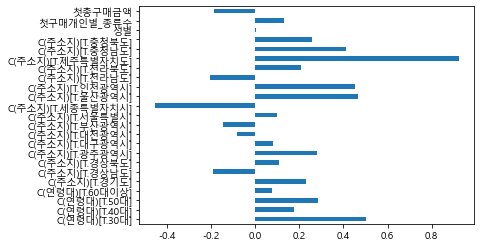

In [298]:
plt.figure(figsize=(20,20))
df_log_scaled_coef = pd.DataFrame({'Coef': scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef', legend=False)

# 2. 의사결정나무

In [204]:
df = df19.copy()

## 오버샘플링

In [205]:
# !pip install imblearn
#샘플링
from imblearn.over_sampling import SMOTE
#목표변수 빈도 확인
print(df.value_counts(["구독여부"]),"\n")
print("구독여부=1 비율",df.value_counts(df["구독여부"]==1)/len(df))

구독여부
0       7949
1       1663
dtype: int64 

구독여부=1 비율 구독여부
False    0.826987
True     0.173013
dtype: float64


In [206]:
# 목표변수, 설명변수 데이터 지정
df_y = df['구독여부']
df_x = df.drop('구독여부',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (5767, 25)
train data Y size: (5767,)
test data X size: (3845, 25)
test data Y size: (3845,)


In [207]:
# over-sampling 설정
sm = SMOTE(sampling_strategy='auto')
# train데이터를 이용한 Over-sampling
x_resampled,y_resampled = sm.fit_resample(df_train_x,df_train_y)
#결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    4789
1     978
Name: 구독여부, dtype: int64 

Over-Sampling 후 Train X: (9578, 25)
Over-Sampling 후 Train Y: (9578,)

Over-Sampling 후 '1':4789
Over-Sampling 후 '0':4789


In [208]:
#데이터 결합
df_resampled = pd.concat([x_resampled,y_resampled], axis = 1)
df_resampled.head()

,성별,첫구매개인별_종류수,첫총구매금액,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,주소지_강원도,주소지_경기도,...,주소지_서울특별시,주소지_세종특별자치시,주소지_울산광역시,주소지_인천광역시,주소지_전라남도,주소지_전라북도,주소지_제주특별자치도,주소지_충청남도,주소지_충청북도,구독여부
0,1,1,9381,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,27185,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,80118,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,19527,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,25270,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [209]:
df_train_x_over,df_test_x_over,df_train_y_over,df_test_y_over = train_test_split(x_resampled,y_resampled,test_size=0.3,
                                                                                stratify=y_resampled,random_state=1)
print('분할 전:',x_resampled.shape,"목표: ",y_resampled.shape)
print('분할 후 설명변수 현황 train:',df_train_x_over.shape,"test: ",df_test_x_over.shape)
print('분할 후 목표변수 현황 train:',df_train_y_over.value_counts(),"test: ",df_test_y_over.value_counts())

분할 전: (9578, 25) 목표:  (9578,)
분할 후 설명변수 현황 train: (6704, 25) test:  (2874, 25)
분할 후 목표변수 현황 train: 1    3352
0    3352
Name: 구독여부, dtype: int64 test:  1    1437
0    1437
Name: 구독여부, dtype: int64


# 튜닝 전 기본모델

In [210]:
# DecisionTreeClassifier
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.988
Accuracy on test set: 0.705


# max_depth

In [211]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#max_depth:최대깊이 변경:1~10
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state =1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.830,0.822
1,2,0.831,0.821
2,3,0.832,0.821
3,4,0.833,0.820
4,5,0.834,0.820
5,6,0.835,0.818
6,7,0.837,0.817
7,8,0.840,0.816
8,9,0.845,0.812
9,10,0.848,0.811


# min_samples_split

In [212]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#min_samples_split: 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split,
                                  max_depth = 7, random_state =1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.836,0.817
1,20,0.834,0.818
2,30,0.834,0.819
3,40,0.834,0.819
4,50,0.833,0.820
5,60,0.832,0.821
6,70,0.831,0.821
7,80,0.831,0.821
8,90,0.831,0.821
9,100,0.831,0.821


# min_samples_leaf

In [213]:
#min_sample_leaf 조정
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#min_samples_leaf: 잎사귀 노드 최소 자료 수: 2~20
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf,
                                  max_depth = 7, random_state =1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.839,0.816
1,4,0.836,0.815
2,6,0.835,0.816
3,8,0.834,0.818
4,10,0.833,0.819
5,12,0.834,0.819
6,14,0.832,0.820
7,16,0.832,0.820
8,18,0.831,0.819
9,20,0.831,0.818


# gridsearch에  scale 적용한 데이터 넣기

In [214]:
estimator = DecisionTreeClassifier(random_state=1234)
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x_over, df_train_y_over)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=10, min_samples_leaf=16, min_samples_split=50,
                       random_state=1234)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 50}

best score: 
0.795


In [217]:
from sklearn.metrics import classification_report
y_pred_sm = grid_dt.predict(df_train_x_over)
AUC = roc_auc_score(df_train_y_over, y_pred_sm)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_dt.score(df_train_x_over, df_train_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))
print(classification_report(df_train_y_over,y_pred_sm,digits=3))

y_pred_sm = grid_dt.predict(df_test_x_over)
AUC = roc_auc_score(df_test_y_over, y_pred_sm)
print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_dt.score(df_test_x_over, df_test_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))
print(classification_report(df_test_y_over,y_pred_sm,digits=3))

Train 예측/분류 결과
Accuracy: 0.804

Coufusion matrix: 
[[2744  608]
 [ 704 2648]]
AUC : 0.8043
              precision    recall  f1-score   support

           0      0.796     0.819     0.807      3352
           1      0.813     0.790     0.801      3352

    accuracy                          0.804      6704
   macro avg      0.805     0.804     0.804      6704
weighted avg      0.805     0.804     0.804      6704

Test 예측/분류 결과
Accuracy: 0.785

Coufusion matrix: 
[[1145  292]
 [ 326 1111]]
AUC : 0.7850
              precision    recall  f1-score   support

           0      0.778     0.797     0.787      1437
           1      0.792     0.773     0.782      1437

    accuracy                          0.785      2874
   macro avg      0.785     0.785     0.785      2874
weighted avg      0.785     0.785     0.785      2874



# gridsearchCV로 파라미터 찾기

In [218]:
# 오버샘플링안한 결과

# y_pred = grid_dt.predict(df_train_x)
# print('Train 예측/분류 결과')
# print("Accuracy: {:.3f}\n".format(grid_dt.score(df_train_x, df_train_y)))
# print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

# print(classification_report(df_train_y,y_pred,digits=3))

# y_pred = grid_dt.predict(df_test_x)
# print('Test 예측/분류 결과')
# print("Accuracy: {:.3f}\n".format(grid_dt.score(df_test_x, df_test_y)))
# print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# print(classification_report(df_test_y,y_pred,digits=3))

In [220]:
# DecisionTreeClassifier
tree_final = DecisionTreeClassifier(random_state=1234, max_depth= 10, min_samples_leaf= 16, min_samples_split= 50)
tree_final.fit(df_train_x_over, df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(tree_final.score(df_train_x_over, df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(tree_final.score(df_test_x_over,df_test_y_over)))

Accuracy on training set: 0.804
Accuracy on test set: 0.785


In [221]:
#변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
7,연령대_60대이상,0.219
3,연령대_20대,0.196
5,연령대_40대,0.142
6,연령대_50대,0.140
4,연령대_30대,0.106
2,첫총구매금액,0.049
16,주소지_서울특별시,0.019
24,주소지_충청북도,0.019
10,주소지_경상남도,0.019
15,주소지_부산광역시,0.016


Text(0, 0.5, '설명변수')

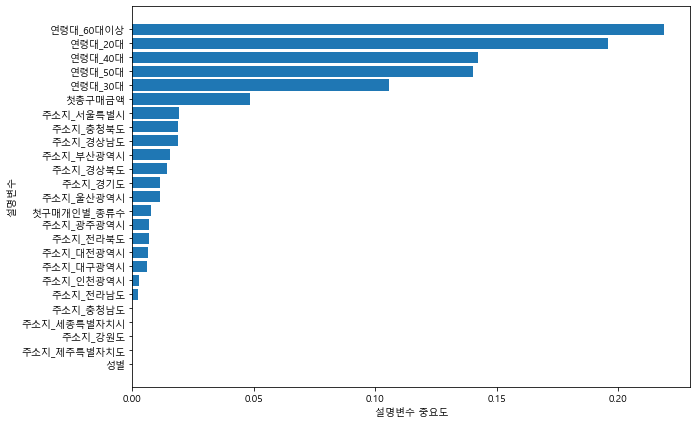

In [222]:
plt.figure(figsize=(10,7))
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

- 중요 설명변수: 
- 첫총구매금액	0.223
- 연령대_60대이상	0.174
- 첫구매개인별_종류수	0.133
- 연령대_20대	순으로 중요함

# 랜덤포레스트

In [223]:
df_train_x_over,df_test_x_over,df_train_y_over,df_test_y_over = train_test_split(x_resampled,y_resampled,test_size=0.3,
                                                                                stratify=y_resampled,random_state=1)
print('분할 전:',x_resampled.shape,"목표: ",y_resampled.shape)
print('분할 후 설명변수 현황 train:',df_train_x_over.shape,"test: ",df_test_x_over.shape)
print('분할 후 목표변수 현황 train:',df_train_y_over.value_counts(),"test: ",df_test_y_over.value_counts())

분할 전: (9578, 25) 목표:  (9578,)
분할 후 설명변수 현황 train: (6704, 25) test:  (2874, 25)
분할 후 목표변수 현황 train: 1    3352
0    3352
Name: 구독여부, dtype: int64 test:  1    1437
0    1437
Name: 구독여부, dtype: int64


# 튜닝 전

In [224]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x_over,df_test_y_over)))

Accuracy on training set: 0.995
Accuracy on test set: 0.843


# gridsearchCV로 튜닝

In [225]:
# 파라미터
para_depth = [depth for depth in range(1,11)]
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

estimator = RandomForestClassifier(n_estimators=100,random_state=1234)
param_grid = {"max_depth": para_depth,  "min_samples_leaf": para_leaf}
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x_over, df_train_y_over)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=1234)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 5}

best score: 
0.813


In [226]:
from sklearn.metrics import classification_report
y_pred_sm = grid_rf.predict(df_train_x_over)
AUC = roc_auc_score(df_train_y_over, y_pred_sm)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_rf.score(df_train_x_over, df_train_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))
print(classification_report(df_train_y_over,y_pred_sm,digits=3))

y_pred_sm = grid_rf.predict(df_test_x_over)
AUC = roc_auc_score(df_test_y_over, y_pred_sm)
print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_rf.score(df_test_x_over, df_test_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))
print(classification_report(df_test_y_over,y_pred_sm,digits=3))

Train 예측/분류 결과
Accuracy: 0.813

Coufusion matrix: 
[[3346    6]
 [1249 2103]]
AUC : 0.8128
              precision    recall  f1-score   support

           0      0.728     0.998     0.842      3352
           1      0.997     0.627     0.770      3352

    accuracy                          0.813      6704
   macro avg      0.863     0.813     0.806      6704
weighted avg      0.863     0.813     0.806      6704

Test 예측/분류 결과
Accuracy: 0.801

Coufusion matrix: 
[[1432    5]
 [ 567  870]]
AUC : 0.8010
              precision    recall  f1-score   support

           0      0.716     0.997     0.834      1437
           1      0.994     0.605     0.753      1437

    accuracy                          0.801      2874
   macro avg      0.855     0.801     0.793      2874
weighted avg      0.855     0.801     0.793      2874



In [227]:
# DecisionTreeClassifier
rf_final = RandomForestClassifier(random_state=1234, n_estimators=100, max_depth= 10, min_samples_leaf= 5)
rf_final.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x_over,df_test_y_over)))

Accuracy on training set: 0.813
Accuracy on test set: 0.801


In [228]:
#변수명 저장
v_feature_name = df_train_x_over.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

#df_feature_importance의 테이브ㄹ을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
4,연령대_30대,0.184
5,연령대_40대,0.145
3,연령대_20대,0.101
6,연령대_50대,0.097
7,연령대_60대이상,0.075
15,주소지_부산광역시,0.062
2,첫총구매금액,0.057
10,주소지_경상남도,0.044
16,주소지_서울특별시,0.041
9,주소지_경기도,0.041


Text(0, 0.5, '설명변수')

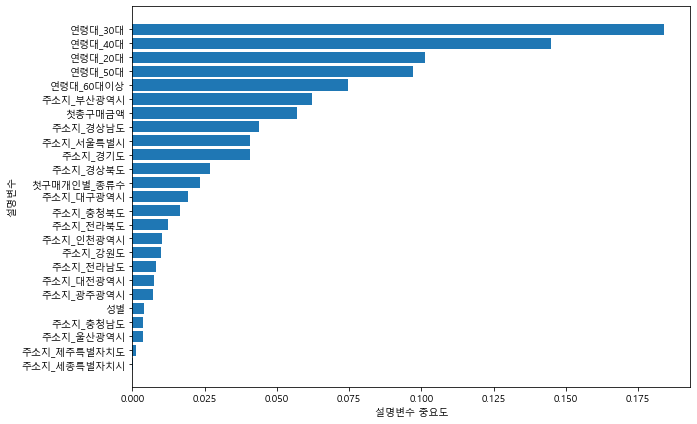

In [229]:
plt.figure(figsize=(10,7))
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

# 3. 그래디언트 부스팅

In [230]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.4,random_state=1234)
print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (9612, 25)
분할 후 설명변수 데이터:Train (5767, 25) Test (3845, 25)


In [231]:
df_test_y_over.value_counts()

1    1437
0    1437
Name: 구독여부, dtype: int64

In [232]:
df_train_x_over,df_test_x_over,df_train_y_over,df_test_y_over = train_test_split(x_resampled,y_resampled,test_size=0.3,
                                                                                stratify=y_resampled,random_state=1)
print('분할 전:',x_resampled.shape,"목표: ",y_resampled.shape)
print('분할 후 설명변수 현황 train:',df_train_x_over.shape,"test: ",df_test_x_over.shape)
print('분할 후 목표변수 현황 train:',df_train_y_over.value_counts(),"test: ",df_test_y_over.value_counts())

분할 전: (9578, 25) 목표:  (9578,)
분할 후 설명변수 현황 train: (6704, 25) test:  (2874, 25)
분할 후 목표변수 현황 train: 1    3352
0    3352
Name: 구독여부, dtype: int64 test:  1    1437
0    1437
Name: 구독여부, dtype: int64


# 튜닝 전

In [233]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x_over,df_test_y_over)))

Accuracy on training set: 0.892
Accuracy on test set: 0.880


# gridsearchCV로 튜닝

In [240]:
# 파라미터
para_lr = [lr * 0.1 for lr in range(1,6)]
para_depth = [depth for depth in range(4,11)]
para_leaf = [n_leaf * 5 for n_leaf in range(1,6)]

estimator = GradientBoostingClassifier(n_estimators=100,random_state=1234)
param_grid = {"learning_rate":para_lr,"max_depth": para_depth,  "min_samples_leaf": para_leaf}
grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_gb.fit(df_train_x_over, df_train_y_over)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=25,
                           random_state=1234)

best parameter: 
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 25}

best score: 
0.89


In [500]:
# # 파라미터
# para_lr = [lr * 0.1 for lr in range(1,10)]
# para_depth = [depth for depth in range(1,11)]
# para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

# estimator = GradientBoostingClassifier(n_estimators=100,random_state=1234)
# param_grid = {"learning_rate":para_lr,"max_depth": para_depth,  "min_samples_leaf": para_leaf}
# grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
# grid_gb.fit(df_train_x, df_train_y)

# print("best estimator model: \n{}".format(grid_gb.best_estimator_))
# print("\nbest parameter: \n{}".format(grid_gb.best_params_))
# print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

In [501]:
# y_pred = grid_gb.predict(df_train_x)
# print('Train 예측/분류 결과')
# print("Accuracy: {:.3f}\n".format(grid_gb.score(df_train_x, df_train_y)))
# print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

# print(classification_report(df_train_y,y_pred,digits=3))

# y_pred = grid_gb.predict(df_test_x)
# print('Test 예측/분류 결과')
# print("Accuracy: {:.3f}\n".format(grid_gb.score(df_test_x, df_test_y)))
# print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
 
# print(classification_report(df_test_y,y_pred,digits=3))

In [ ]:
# grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
# grid_gb.fit(df_train_x_over, df_train_y_over)

In [248]:
# GradientBoostingClassifier
grid_gb = GradientBoostingClassifier(learning_rate= 0.2, random_state=1234, n_estimators=100, max_depth= 10, min_samples_leaf= 25)
grid_gb.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(grid_gb.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(grid_gb.score(df_test_x_over,df_test_y_over)))

Accuracy on training set: 0.929
Accuracy on test set: 0.874


In [242]:
df_test_y.value_counts()

0    3160
1     685
Name: 구독여부, dtype: int64

In [243]:
from sklearn.metrics import classification_report

y_pred_sm = grid_gb.predict(df_train_x_over)
# AUC = roc_auc_score(df_train_y_over, y_pred_sm)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_gb.score(df_train_x_over, df_train_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y_over, y_pred_sm)))
# print("AUC : {:.4f}".format(AUC))
print(classification_report(df_train_y_over,y_pred_sm,digits=3))

y_pred_sm = grid_gb.predict(df_test_x_over)
# AUC = roc_auc_score(df_test_y_over, y_pred_sm)
# print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_gb.score(df_test_x_over, df_test_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_sm)))
# print("AUC : {:.4f}".format(AUC))
print(classification_report(df_test_y_over,y_pred_sm,digits=3))

Train 예측/분류 결과
Accuracy: 0.929

Coufusion matrix: 
[[3336   16]
 [ 462 2890]]
              precision    recall  f1-score   support

           0      0.878     0.995     0.933      3352
           1      0.994     0.862     0.924      3352

    accuracy                          0.929      6704
   macro avg      0.936     0.929     0.928      6704
weighted avg      0.936     0.929     0.928      6704

Accuracy: 0.874

Coufusion matrix: 
[[1373   64]
 [ 297 1140]]
              precision    recall  f1-score   support

           0      0.822     0.955     0.884      1437
           1      0.947     0.793     0.863      1437

    accuracy                          0.874      2874
   macro avg      0.884     0.874     0.874      2874
weighted avg      0.884     0.874     0.874      2874



In [249]:
# GradientBoostingClassifier
gb_final = GradientBoostingClassifier(learning_rate= 0.2, random_state=1234, n_estimators=100, max_depth= 5, min_samples_leaf= 25)
gb_final.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x_over,df_test_y_over)))

Accuracy on training set: 0.897
Accuracy on test set: 0.881


In [250]:
#변수명 저장
v_feature_name = df_train_x_over.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
7,연령대_60대이상,0.149
3,연령대_20대,0.133
5,연령대_40대,0.098
6,연령대_50대,0.096
4,연령대_30대,0.076
2,첫총구매금액,0.066
9,주소지_경기도,0.042
15,주소지_부산광역시,0.035
10,주소지_경상남도,0.032
16,주소지_서울특별시,0.032


Text(0, 0.5, '설명변수')

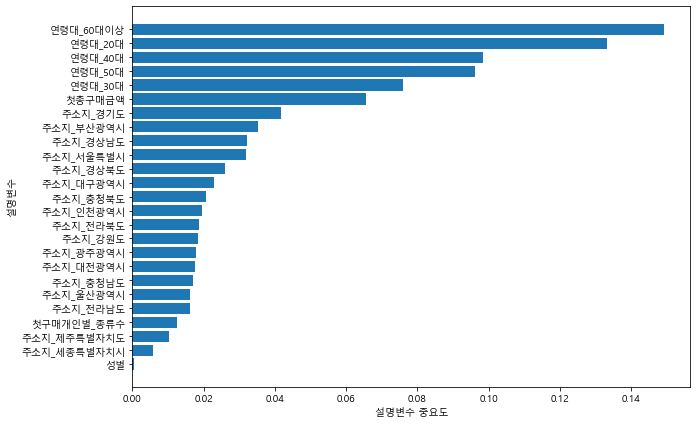

In [251]:
plt.figure(figsize=(10,7))
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## LightGBM

In [589]:
!pip install lightgbm

In [252]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [253]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.4,random_state=1234)
print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (9612, 25)
분할 후 설명변수 데이터:Train (5767, 25) Test (3845, 25)


In [254]:
df_train_x_over,df_test_x_over,df_train_y_over,df_test_y_over = train_test_split(x_resampled,y_resampled,test_size=0.3,
                                                                                stratify=y_resampled,random_state=1)
print('분할 전:',x_resampled.shape,"목표: ",y_resampled.shape)
print('분할 후 설명변수 현황 train:',df_train_x_over.shape,"test: ",df_test_x_over.shape)
print('분할 후 목표변수 현황 train:',df_train_y_over.value_counts(),"test: ",df_test_y_over.value_counts())

분할 전: (9578, 25) 목표:  (9578,)
분할 후 설명변수 현황 train: (6704, 25) test:  (2874, 25)
분할 후 목표변수 현황 train: 1    3352
0    3352
Name: 구독여부, dtype: int64 test:  1    1437
0    1437
Name: 구독여부, dtype: int64


# 튜닝 전

In [255]:
gbm_uncustomized = LGBMClassifier(random_state=1234)
gbm_uncustomized.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(gbm_uncustomized.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(gbm_uncustomized.score(df_test_x_over,df_test_y_over)))

Accuracy on training set: 0.905
Accuracy on test set: 0.882


# gridsearchCV로 튜닝

In [256]:
# 파라미터
para_lr = [lr * 0.3 for lr in range(1,5)]
para_depth = [depth for depth in range(1,11)]
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

estimator = LGBMClassifier(n_estimators=100,random_state=1234)
param_grid = {"learning_rate":para_lr,"max_depth": para_depth,  "min_samples_leaf": para_leaf}
grid_gbm = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_gbm.fit(df_train_x_over, df_train_y_over)

print("best estimator model: \n{}".format(grid_gbm.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gbm.best_params_))
print("\nbest score: \n{}".format(grid_gbm.best_score_.round(3)))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
best estimator model: 
LGBMClassifier(learning_rate=1.2, max_depth=1, min_samples_leaf=5,
               random_state=1234)

best parameter: 
{'learning_rate': 1.2, 'max_depth': 1, 'min_samples_leaf': 5}

best score: 
0.891


In [500]:
# # 파라미터
# para_lr = [lr * 0.1 for lr in range(1,10)]
# para_depth = [depth for depth in range(1,11)]
# para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

# estimator = GradientBoostingClassifier(n_estimators=100,random_state=1234)
# param_grid = {"learning_rate":para_lr,"max_depth": para_depth,  "min_samples_leaf": para_leaf}
# grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
# grid_gb.fit(df_train_x, df_train_y)

# print("best estimator model: \n{}".format(grid_gb.best_estimator_))
# print("\nbest parameter: \n{}".format(grid_gb.best_params_))
# print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

In [501]:
# y_pred = grid_gb.predict(df_train_x)
# print('Train 예측/분류 결과')
# print("Accuracy: {:.3f}\n".format(grid_gb.score(df_train_x, df_train_y)))
# print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

# print(classification_report(df_train_y,y_pred,digits=3))

# y_pred = grid_gb.predict(df_test_x)
# print('Test 예측/분류 결과')
# print("Accuracy: {:.3f}\n".format(grid_gb.score(df_test_x, df_test_y)))
# print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
 
# print(classification_report(df_test_y,y_pred,digits=3))

In [257]:
from sklearn.metrics import classification_report

y_pred_sm = grid_gbm.predict(df_train_x_over)
AUC = roc_auc_score(df_train_y_over, y_pred_sm)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_gbm.score(df_train_x_over, df_train_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))

print(classification_report(df_train_y_over,y_pred_sm,digits=3))

y_pred_sm = grid_gbm.predict(df_test_x_over)
AUC = roc_auc_score(df_test_y_over, y_pred_sm)
print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_gbm.score(df_test_x_over, df_test_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))

print(classification_report(df_test_y_over,y_pred_sm,digits=3))

Train 예측/분류 결과
Accuracy: 0.891

Coufusion matrix: 
[[3352    0]
 [ 729 2623]]
AUC : 0.8913
              precision    recall  f1-score   support

           0      0.821     1.000     0.902      3352
           1      1.000     0.783     0.878      3352

    accuracy                          0.891      6704
   macro avg      0.911     0.891     0.890      6704
weighted avg      0.911     0.891     0.890      6704

Test 예측/분류 결과
Accuracy: 0.885

Coufusion matrix: 
[[1437    0]
 [ 331 1106]]
AUC : 0.8848
              precision    recall  f1-score   support

           0      0.813     1.000     0.897      1437
           1      1.000     0.770     0.870      1437

    accuracy                          0.885      2874
   macro avg      0.906     0.885     0.883      2874
weighted avg      0.906     0.885     0.883      2874



In [258]:
# GradientBoostingClassifier
gbm_final = LGBMClassifier(learning_rate= 1.2, random_state=1234, n_estimators=100, max_depth= 1, min_samples_leaf= 5)
gbm_final.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(gbm_final.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(gbm_final.score(df_test_x_over,df_test_y_over)))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
Accuracy on training set: 0.891
Accuracy on test set: 0.885


In [259]:
#변수명 저장
v_feature_name = df_train_x_over.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = gbm_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
15,주소지_부산광역시,7
9,주소지_경기도,7
10,주소지_경상남도,6
16,주소지_서울특별시,6
2,첫총구매금액,5
4,연령대_30대,5
8,주소지_강원도,5
11,주소지_경상북도,5
13,주소지_대구광역시,5
12,주소지_광주광역시,4


Text(0, 0.5, '설명변수')

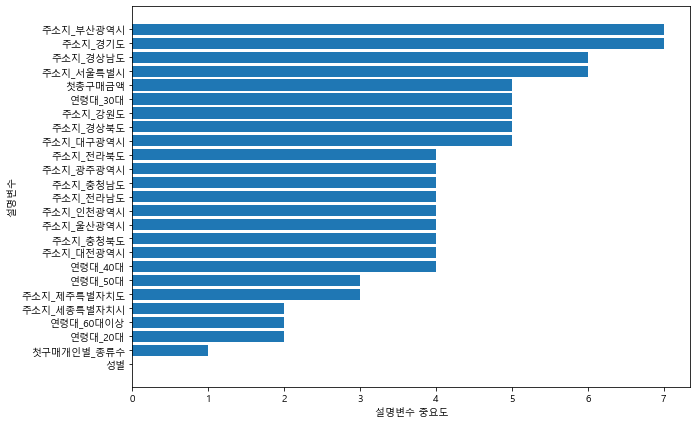

In [260]:
plt.figure(figsize=(10,7))
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## CatBoost

In [261]:
!pip install catboost
from catboost import CatBoostClassifier
# from lightgbm import plot_importance 미지원

In [262]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.4,random_state=1234)
print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (9612, 25)
분할 후 설명변수 데이터:Train (5767, 25) Test (3845, 25)


In [263]:
df_train_x_over,df_test_x_over,df_train_y_over,df_test_y_over = train_test_split(x_resampled,y_resampled,test_size=0.3,
                                                                                stratify=y_resampled,random_state=1)
print('분할 전:',x_resampled.shape,"목표: ",y_resampled.shape)
print('분할 후 설명변수 현황 train:',df_train_x_over.shape,"test: ",df_test_x_over.shape)
print('분할 후 목표변수 현황 train:',df_train_y_over.value_counts(),"test: ",df_test_y_over.value_counts())

분할 전: (9578, 25) 목표:  (9578,)
분할 후 설명변수 현황 train: (6704, 25) test:  (2874, 25)
분할 후 목표변수 현황 train: 1    3352
0    3352
Name: 구독여부, dtype: int64 test:  1    1437
0    1437
Name: 구독여부, dtype: int64


# 튜닝 전

In [264]:
cbc_uncustomized = CatBoostClassifier(random_state=1234)
cbc_uncustomized.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(cbc_uncustomized.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(cbc_uncustomized.score(df_test_x_over,df_test_y_over)))

Learning rate set to 0.023216
0:	learn: 0.6662659	total: 162ms	remaining: 2m 41s
1:	learn: 0.6415142	total: 165ms	remaining: 1m 22s
2:	learn: 0.6194908	total: 167ms	remaining: 55.6s
3:	learn: 0.5998493	total: 170ms	remaining: 42.3s
4:	learn: 0.5824608	total: 172ms	remaining: 34.3s
5:	learn: 0.5670038	total: 175ms	remaining: 28.9s
6:	learn: 0.5531385	total: 177ms	remaining: 25.1s
7:	learn: 0.5410754	total: 179ms	remaining: 22.2s
8:	learn: 0.5304191	total: 182ms	remaining: 20s
9:	learn: 0.5272269	total: 184ms	remaining: 18.2s
10:	learn: 0.5248634	total: 187ms	remaining: 16.8s
11:	learn: 0.5218059	total: 189ms	remaining: 15.6s
12:	learn: 0.5126468	total: 192ms	remaining: 14.5s
13:	learn: 0.5105871	total: 194ms	remaining: 13.7s
14:	learn: 0.5024920	total: 196ms	remaining: 12.9s
15:	learn: 0.5001873	total: 199ms	remaining: 12.2s
16:	learn: 0.4933333	total: 201ms	remaining: 11.6s
17:	learn: 0.4917478	total: 204ms	remaining: 11.1s
18:	learn: 0.4900356	total: 206ms	remaining: 10.6s
19:	learn: 

169:	learn: 0.3849996	total: 569ms	remaining: 2.77s
170:	learn: 0.3846483	total: 571ms	remaining: 2.77s
171:	learn: 0.3843751	total: 574ms	remaining: 2.76s
172:	learn: 0.3840472	total: 576ms	remaining: 2.75s
173:	learn: 0.3836793	total: 579ms	remaining: 2.75s
174:	learn: 0.3832994	total: 582ms	remaining: 2.74s
175:	learn: 0.3829378	total: 584ms	remaining: 2.74s
176:	learn: 0.3825972	total: 587ms	remaining: 2.73s
177:	learn: 0.3822586	total: 590ms	remaining: 2.72s
178:	learn: 0.3820314	total: 592ms	remaining: 2.71s
179:	learn: 0.3816690	total: 594ms	remaining: 2.71s
180:	learn: 0.3814632	total: 597ms	remaining: 2.7s
181:	learn: 0.3811475	total: 599ms	remaining: 2.69s
182:	learn: 0.3809014	total: 602ms	remaining: 2.69s
183:	learn: 0.3805178	total: 605ms	remaining: 2.68s
184:	learn: 0.3801575	total: 607ms	remaining: 2.67s
185:	learn: 0.3797524	total: 610ms	remaining: 2.67s
186:	learn: 0.3794116	total: 612ms	remaining: 2.66s
187:	learn: 0.3791141	total: 615ms	remaining: 2.65s
188:	learn: 0

385:	learn: 0.3328370	total: 1.1s	remaining: 1.75s
386:	learn: 0.3326770	total: 1.1s	remaining: 1.74s
387:	learn: 0.3324937	total: 1.1s	remaining: 1.74s
388:	learn: 0.3322429	total: 1.11s	remaining: 1.74s
389:	learn: 0.3320354	total: 1.11s	remaining: 1.73s
390:	learn: 0.3318270	total: 1.11s	remaining: 1.73s
391:	learn: 0.3316481	total: 1.11s	remaining: 1.73s
392:	learn: 0.3314422	total: 1.11s	remaining: 1.72s
393:	learn: 0.3312648	total: 1.12s	remaining: 1.72s
394:	learn: 0.3310291	total: 1.12s	remaining: 1.72s
395:	learn: 0.3308681	total: 1.12s	remaining: 1.71s
396:	learn: 0.3306137	total: 1.13s	remaining: 1.71s
397:	learn: 0.3304089	total: 1.13s	remaining: 1.71s
398:	learn: 0.3302358	total: 1.13s	remaining: 1.7s
399:	learn: 0.3300685	total: 1.13s	remaining: 1.7s
400:	learn: 0.3298593	total: 1.13s	remaining: 1.7s
401:	learn: 0.3296952	total: 1.14s	remaining: 1.69s
402:	learn: 0.3295060	total: 1.14s	remaining: 1.69s
403:	learn: 0.3293257	total: 1.14s	remaining: 1.68s
404:	learn: 0.3291

608:	learn: 0.3005307	total: 1.64s	remaining: 1.05s
609:	learn: 0.3004419	total: 1.64s	remaining: 1.05s
610:	learn: 0.3003105	total: 1.64s	remaining: 1.05s
611:	learn: 0.3001943	total: 1.65s	remaining: 1.04s
612:	learn: 0.3001092	total: 1.65s	remaining: 1.04s
613:	learn: 0.2999871	total: 1.65s	remaining: 1.04s
614:	learn: 0.2998884	total: 1.65s	remaining: 1.03s
615:	learn: 0.2998052	total: 1.66s	remaining: 1.03s
616:	learn: 0.2996800	total: 1.66s	remaining: 1.03s
617:	learn: 0.2995982	total: 1.66s	remaining: 1.03s
618:	learn: 0.2994497	total: 1.66s	remaining: 1.02s
619:	learn: 0.2993322	total: 1.67s	remaining: 1.02s
620:	learn: 0.2992107	total: 1.67s	remaining: 1.02s
621:	learn: 0.2991043	total: 1.67s	remaining: 1.02s
622:	learn: 0.2989709	total: 1.68s	remaining: 1.01s
623:	learn: 0.2988390	total: 1.68s	remaining: 1.01s
624:	learn: 0.2987508	total: 1.68s	remaining: 1.01s
625:	learn: 0.2986748	total: 1.68s	remaining: 1s
626:	learn: 0.2985894	total: 1.69s	remaining: 1s
627:	learn: 0.2984

827:	learn: 0.2782909	total: 2.18s	remaining: 453ms
828:	learn: 0.2781768	total: 2.18s	remaining: 451ms
829:	learn: 0.2780640	total: 2.19s	remaining: 448ms
830:	learn: 0.2779957	total: 2.19s	remaining: 445ms
831:	learn: 0.2779154	total: 2.19s	remaining: 443ms
832:	learn: 0.2778091	total: 2.19s	remaining: 440ms
833:	learn: 0.2777111	total: 2.2s	remaining: 437ms
834:	learn: 0.2776363	total: 2.2s	remaining: 435ms
835:	learn: 0.2775556	total: 2.2s	remaining: 432ms
836:	learn: 0.2774761	total: 2.21s	remaining: 430ms
837:	learn: 0.2773879	total: 2.21s	remaining: 427ms
838:	learn: 0.2772689	total: 2.21s	remaining: 424ms
839:	learn: 0.2771522	total: 2.21s	remaining: 422ms
840:	learn: 0.2770653	total: 2.22s	remaining: 419ms
841:	learn: 0.2769712	total: 2.22s	remaining: 416ms
842:	learn: 0.2768679	total: 2.22s	remaining: 414ms
843:	learn: 0.2768125	total: 2.22s	remaining: 411ms
844:	learn: 0.2767625	total: 2.23s	remaining: 408ms
845:	learn: 0.2766678	total: 2.23s	remaining: 406ms
846:	learn: 0.2

# gridsearchCV로 튜닝

In [267]:
# 파라미터
para_lr = [lr * 0.3 for lr in range(1,5)]
para_depth = [depth for depth in range(1,11)]
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

estimator = CatBoostClassifier(n_estimators=100,random_state=1234)
param_grid = {"learning_rate":para_lr,"max_depth": para_depth}
grid_cbc = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_cbc.fit(df_train_x_over, df_train_y_over)

print("best estimator model: \n{}".format(grid_cbc.best_estimator_))
print("\nbest parameter: \n{}".format(grid_cbc.best_params_))
print("\nbest score: \n{}".format(grid_cbc.best_score_.round(3)))

0:	learn: 0.6699026	total: 1.14ms	remaining: 113ms
1:	learn: 0.6471089	total: 2.48ms	remaining: 122ms
2:	learn: 0.6307086	total: 3.65ms	remaining: 118ms
3:	learn: 0.6126139	total: 4.81ms	remaining: 116ms
4:	learn: 0.5968531	total: 6.13ms	remaining: 117ms
5:	learn: 0.5790961	total: 7.3ms	remaining: 114ms
6:	learn: 0.5650639	total: 8.73ms	remaining: 116ms
7:	learn: 0.5555550	total: 10.3ms	remaining: 118ms
8:	learn: 0.5478810	total: 11.6ms	remaining: 117ms
9:	learn: 0.5405491	total: 12.9ms	remaining: 116ms
10:	learn: 0.5323102	total: 14.4ms	remaining: 116ms
11:	learn: 0.5233194	total: 15.6ms	remaining: 114ms
12:	learn: 0.5161847	total: 17ms	remaining: 113ms
13:	learn: 0.5087083	total: 18.3ms	remaining: 112ms
14:	learn: 0.5028023	total: 19.6ms	remaining: 111ms
15:	learn: 0.4959061	total: 21.1ms	remaining: 111ms
16:	learn: 0.4901087	total: 22.7ms	remaining: 111ms
17:	learn: 0.4851226	total: 24.1ms	remaining: 110ms
18:	learn: 0.4808940	total: 25.5ms	remaining: 109ms
19:	learn: 0.4754588	tota

In [268]:
from sklearn.metrics import classification_report

y_pred_sm = grid_cbc.predict(df_train_x_over)
AUC = roc_auc_score(df_train_y_over, y_pred_sm)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_cbc.score(df_train_x_over, df_train_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))

print(classification_report(df_train_y_over,y_pred_sm,digits=3))

y_pred_sm = grid_cbc.predict(df_test_x_over)
AUC = roc_auc_score(df_test_y_over, y_pred_sm)
print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_cbc.score(df_test_x_over, df_test_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))

print(classification_report(df_test_y_over,y_pred_sm,digits=3))

Train 예측/분류 결과
Accuracy: 0.891

Coufusion matrix: 
[[3352    0]
 [ 729 2623]]
AUC : 0.8913
              precision    recall  f1-score   support

           0      0.821     1.000     0.902      3352
           1      1.000     0.783     0.878      3352

    accuracy                          0.891      6704
   macro avg      0.911     0.891     0.890      6704
weighted avg      0.911     0.891     0.890      6704

Test 예측/분류 결과
Accuracy: 0.885

Coufusion matrix: 
[[1437    0]
 [ 331 1106]]
AUC : 0.8848
              precision    recall  f1-score   support

           0      0.813     1.000     0.897      1437
           1      1.000     0.770     0.870      1437

    accuracy                          0.885      2874
   macro avg      0.906     0.885     0.883      2874
weighted avg      0.906     0.885     0.883      2874



In [272]:
# GradientBoostingClassifier
cbc_final = CatBoostClassifier(learning_rate= 0.6, random_state=1234, n_estimators=100, max_depth= 6)
cbc_final.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(cbc_final.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(cbc_final.score(df_test_x_over,df_test_y_over)))

0:	learn: 0.4428503	total: 2.36ms	remaining: 234ms
1:	learn: 0.4225800	total: 4.81ms	remaining: 236ms
2:	learn: 0.4094375	total: 7.24ms	remaining: 234ms
3:	learn: 0.3982237	total: 9.94ms	remaining: 239ms
4:	learn: 0.3857379	total: 12.2ms	remaining: 232ms
5:	learn: 0.3729724	total: 14.7ms	remaining: 231ms
6:	learn: 0.3658822	total: 17.3ms	remaining: 230ms
7:	learn: 0.3561557	total: 20.2ms	remaining: 232ms
8:	learn: 0.3497172	total: 23.1ms	remaining: 233ms
9:	learn: 0.3419419	total: 25.8ms	remaining: 232ms
10:	learn: 0.3386966	total: 28.4ms	remaining: 230ms
11:	learn: 0.3330763	total: 30.9ms	remaining: 226ms
12:	learn: 0.3287868	total: 33.2ms	remaining: 222ms
13:	learn: 0.3233241	total: 35.7ms	remaining: 219ms
14:	learn: 0.3189796	total: 38ms	remaining: 215ms
15:	learn: 0.3148609	total: 40.6ms	remaining: 213ms
16:	learn: 0.3108660	total: 43.3ms	remaining: 211ms
17:	learn: 0.3065340	total: 45.5ms	remaining: 207ms
18:	learn: 0.3022812	total: 47.9ms	remaining: 204ms
19:	learn: 0.2995707	tot

In [273]:
#변수명 저장
v_feature_name = df_train_x_over.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = cbc_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
4,연령대_30대,25.426
5,연령대_40대,20.148
6,연령대_50대,13.684
3,연령대_20대,11.673
7,연령대_60대이상,9.354
2,첫총구매금액,6.141
1,첫구매개인별_종류수,2.077
9,주소지_경기도,1.408
10,주소지_경상남도,1.081
16,주소지_서울특별시,0.983


Text(0, 0.5, '설명변수')

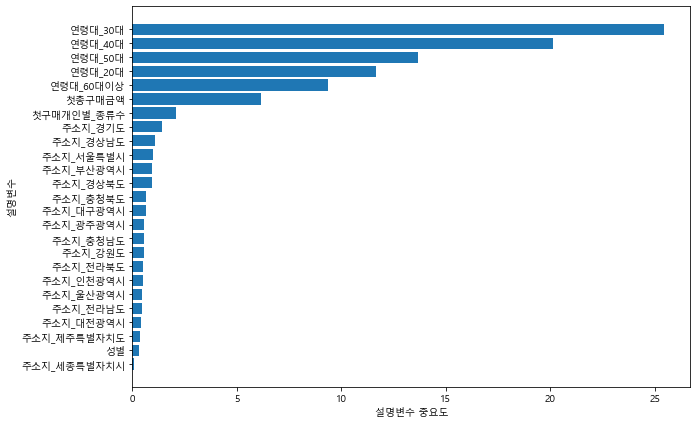

In [274]:
plt.figure(figsize=(10,7))
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

# xgbboost

In [651]:
!pip install xgboost

In [275]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.4,random_state=1234)
print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (9612, 25)
분할 후 설명변수 데이터:Train (5767, 25) Test (3845, 25)


In [276]:
df_train_x_over,df_test_x_over,df_train_y_over,df_test_y_over = train_test_split(x_resampled,y_resampled,test_size=0.3,
                                                                                stratify=y_resampled,random_state=1)
print('분할 전:',x_resampled.shape,"목표: ",y_resampled.shape)
print('분할 후 설명변수 현황 train:',df_train_x_over.shape,"test: ",df_test_x_over.shape)
print('분할 후 목표변수 현황 train:',df_train_y_over.value_counts(),"test: ",df_test_y_over.value_counts())

분할 전: (9578, 25) 목표:  (9578,)
분할 후 설명변수 현황 train: (6704, 25) test:  (2874, 25)
분할 후 목표변수 현황 train: 1    3352
0    3352
Name: 구독여부, dtype: int64 test:  1    1437
0    1437
Name: 구독여부, dtype: int64


# 튜닝 전

In [277]:
from xgboost import XGBClassifier

In [278]:
xgb_uncustomized = XGBClassifier(random_state=1234)
xgb_uncustomized.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(xgb_uncustomized.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(xgb_uncustomized.score(df_test_x_over,df_test_y_over)))

Accuracy on training set: 0.925
Accuracy on test set: 0.869


# gridsearchCV로 튜닝

In [280]:
# 파라미터
para_lr = [lr * 0.1 for lr in range(3,10)]
para_depth = [depth for depth in range(4,11)]
para_leaf = [n_leaf * 5 for n_leaf in range(1,3)]

estimator = XGBClassifier(n_estimators=100,random_state=1234)
param_grid = {"learning_rate":para_lr,"max_depth": para_depth, "min_samples_leaf": para_leaf}
grid_xgb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_xgb.fit(df_train_x_over, df_train_y_over)

print("best estimator model: \n{}".format(grid_xgb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_xgb.best_params_))
print("\nbest score: \n{}".format(grid_xgb.best_score_.round(3)))

[13:30:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

best estimator model: 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.30000000000000004,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_samples_leaf=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

best 

In [281]:
from sklearn.metrics import classification_report

y_pred_sm = grid_xgb.predict(df_train_x_over)
AUC = roc_auc_score(df_train_y_over, y_pred_sm)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_xgb.score(df_train_x_over, df_train_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))

print(classification_report(df_train_y_over,y_pred_sm,digits=3))

y_pred_sm = grid_xgb.predict(df_test_x_over)
AUC = roc_auc_score(df_test_y_over, y_pred_sm)
print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_xgb.score(df_test_x_over, df_test_y_over)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_sm)))
print("AUC : {:.4f}".format(AUC))

print(classification_report(df_test_y_over,y_pred_sm,digits=3))

Train 예측/분류 결과
Accuracy: 0.904

Coufusion matrix: 
[[3337   15]
 [ 627 2725]]
AUC : 0.9042
              precision    recall  f1-score   support

           0      0.842     0.996     0.912      3352
           1      0.995     0.813     0.895      3352

    accuracy                          0.904      6704
   macro avg      0.918     0.904     0.903      6704
weighted avg      0.918     0.904     0.903      6704

Test 예측/분류 결과
Accuracy: 0.880

Coufusion matrix: 
[[1411   26]
 [ 318 1119]]
AUC : 0.8803
              precision    recall  f1-score   support

           0      0.816     0.982     0.891      1437
           1      0.977     0.779     0.867      1437

    accuracy                          0.880      2874
   macro avg      0.897     0.880     0.879      2874
weighted avg      0.897     0.880     0.879      2874



In [282]:
# GradientBoostingClassifier
xgb_final = XGBClassifier(learning_rate= 0.3, random_state=1234, n_estimators=100, max_depth= 4, min_samples_leaf= 5)
xgb_final.fit(df_train_x_over,df_train_y_over)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(xgb_final.score(df_train_x_over,df_train_y_over)))
print("Accuracy on test set: {:.3f}".format(xgb_final.score(df_test_x_over,df_test_y_over)))

[13:31:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Accuracy on training set: 0.904
Accuracy on test set: 0.880


In [283]:
#변수명 저장
v_feature_name = df_train_x_over.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = xgb_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
5,연령대_40대,0.124
6,연령대_50대,0.117
3,연령대_20대,0.096
4,연령대_30대,0.087
7,연령대_60대이상,0.046
16,주소지_서울특별시,0.037
15,주소지_부산광역시,0.037
11,주소지_경상북도,0.036
13,주소지_대구광역시,0.036
10,주소지_경상남도,0.036


Text(0, 0.5, '설명변수')

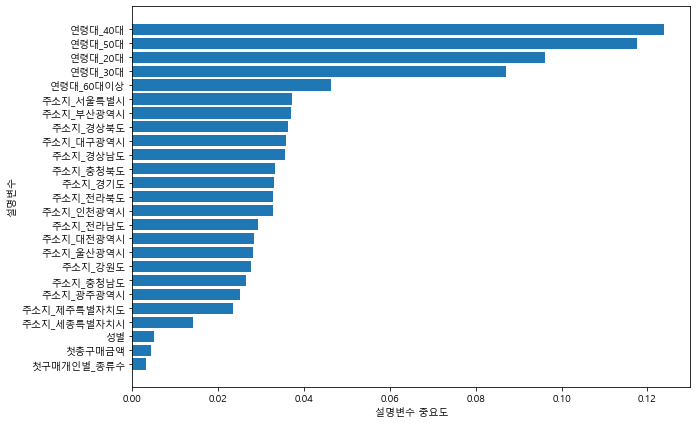

In [284]:
plt.figure(figsize=(10,7))
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

# 4. SVM

In [586]:
# SVM
from sklearn.svm import SVC

In [587]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,성별,첫구매개인별_종류수,첫총구매금액,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,주소지_강원도,주소지_경기도,...,주소지_부산광역시,주소지_서울특별시,주소지_세종특별자치시,주소지_울산광역시,주소지_인천광역시,주소지_전라남도,주소지_전라북도,주소지_제주특별자치도,주소지_충청남도,주소지_충청북도
0,-0.261006,0.47076,0.045148,-0.364252,-0.784846,-0.5983,2.357348,-0.305906,-0.217266,-0.475941,...,-0.355892,-0.375048,-0.092512,-0.181942,-0.213295,-0.17184,-0.208555,-0.10396,-0.215805,-0.215719
1,-0.261006,0.47076,0.045148,-0.364252,-0.784846,-0.5983,2.357348,-0.305906,-0.217266,-0.475941,...,-0.355892,-0.375048,-0.092512,-0.181942,-0.213295,-0.17184,-0.208555,-0.10396,-0.215805,-0.215719
2,-0.261006,0.47076,0.045148,-0.364252,-0.784846,-0.5983,2.357348,-0.305906,-0.217266,-0.475941,...,-0.355892,-0.375048,-0.092512,-0.181942,-0.213295,-0.17184,-0.208555,-0.10396,-0.215805,-0.215719
3,-0.261006,0.47076,0.045148,-0.364252,-0.784846,-0.5983,2.357348,-0.305906,-0.217266,-0.475941,...,-0.355892,-0.375048,-0.092512,-0.181942,-0.213295,-0.17184,-0.208555,-0.10396,-0.215805,-0.215719
4,-0.261006,0.47076,0.045148,-0.364252,-0.784846,-0.5983,2.357348,-0.305906,-0.217266,-0.475941,...,-0.355892,-0.375048,-0.092512,-0.181942,-0.213295,-0.17184,-0.208555,-0.10396,-0.215805,-0.215719


In [511]:
# Data Split
random = 1234
df_scaled_train_x, df_scaled_test_x, df_scaled_train_y, df_scaled_test_y = train_test_split(df_scaled, df_y, test_size = 0.4, random_state = 1234)

# gridsearch로 파라미터 튜닝

In [512]:
estimator = SVC(random_state=1234)
para_c = [c*0.1 for c in range(1,21)]
para_gamma = [0.05*gamma for gamma in range(1,15)]
param_gird = {"C" : para_c, "gamma" : para_gamma}

grid_svm = GridSearchCV(estimator, param_gird, scoring="accuracy", n_jobs = -1)
grid_svm.fit(df_scaled_train_x, df_scaled_train_y)
print("best estimator model: \n {0}".format(grid_svm.best_estimator_))
print("\n best parameter: \n {}".format(grid_svm.best_params_))
print("\n best score: \n {}".format(grid_svm.best_score_.round(3)))

KeyboardInterrupt: 